# Смирнов В.М. - Теория вероятностей, ДЗ1, практика
Проиллюстрировать теорему Гливенко-Кантелли:
$$\lim_{n\rightarrow \infty} \sup_{x}|F(x)-\bar{F}_n(x)|\rightarrow 0$$
на примере произвольного распределения. 
Рассмотрим два случая: равномерное распределение на $[0, 1]$ и стандартное нормальное. Используя генератор псевдослучайных чисел, для $n$ испытаний построим эмпирическую функцию распределения, вычислим $max_{x \in \{X_i\}}(F(x)-\bar{F}_n(x))$, построим зависимость от n. 

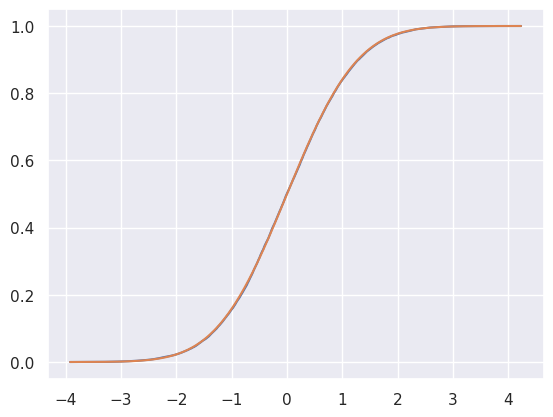

In [128]:
import numpy as np
from scipy.special import erf
from numpy import random
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

def emp_dist_func(array: np.ndarray) -> np.ndarray: # We suppose that identical observations 
                                                    # are rare, because I am lazy. They really are rare in this
                                                    # context.
    N = array.shape[0]
    r = np.stack([(1/N)*(np.array(range(N))+1), np.sort(array)])
    return r
        
    
test = emp_dist_func(random.normal(size=20000))
plt.plot(test[1, :], test[0, :])
plt.plot(test[1, :], np.vectorize(lambda x: 1/2*(erf(x/(2**(1/2))) + 1))(test[1, :])) 
# Cumulative distribution function of the N(0, 1) is 1/2*(erf(x/(2**(1/2))))

Поскольку в данном контексте одинаковые измерения редки, эмпирическая функция распределения - просто функция-счётчик на точках выборки, отсортированных по возрастанию. Такое представление реализовано в функции `emp_dist_func`. Ниже на одном графике нарисованы эмпирическая функция распределения для выборки из 20000 наблюдений, и теоретическая функция распределения стандартного нормального распределения в соответствующих точках. Последняя реализована как
$$\frac{1}{2}\cdot\left(erf\left(\frac{x}{\sqrt{2}}\right)+1\right)$$
Как можно заметить, графики практически совпадают. Построим теперь зависимость максимума модуля разности теоретической и эмпирической функции распределения от числа наблюдений для двух вышеупомянутых распределений.

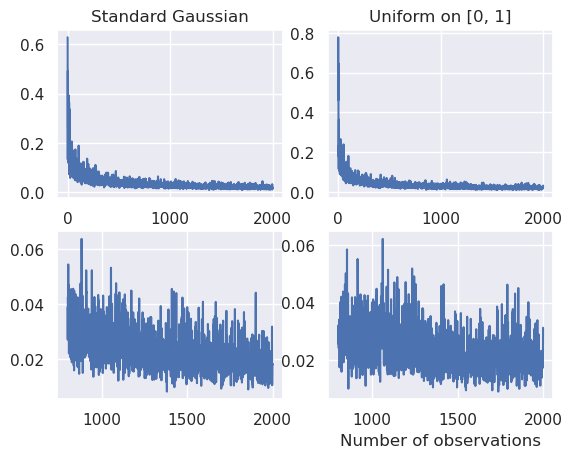

In [156]:

max_diff_gaussian = []
for N in range(1, 2001):
    sample = random.normal(size=N)
    edf = emp_dist_func(sample)
    theoretical_distribution_function = np.vectorize(lambda x: 1/2*(erf(x/(2**(1/2))) + 1))(edf[1, :])
    
    max_diff_gaussian.append(max(abs(edf[0, :]-theoretical_distribution_function)))

    
max_diff_uniform = []

for N in range(1, 2001):
    sample = random.uniform(size=N)
    edf = emp_dist_func(sample)
    theoretical_distribution_function = np.vectorize(lambda x: x)(edf[1, :])
    
    max_diff_uniform.append(max(abs(edf[0, :]-theoretical_distribution_function)))

    

figure, axis = plt.subplots(2, 2)
axis[0, 0].plot(max_diff_gaussian)
axis[0, 0].set_title("Standard Gaussian")


axis[1, 0].plot(list(range(800, 2000)), max_diff_gaussian[800:])


axis[0, 1].plot(max_diff_uniform)
axis[0, 1].set_title("Uniform on [0, 1]")

axis[1, 1].plot(list(range(800, 2000)), max_diff_uniform[800:])

plt.xlabel("Number of observations")

plt.show()

Как можно заметить, максимум модуля разности действительно неуклонно убывает с ростом числа измерений. 